In [102]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [103]:
# poner como separadores ;  y la primera fila son nombres de columnas, cargamos los datos.

full_df = pd.read_csv('airbnb-listings-extract.csv', sep=';', header=0,  low_memory=False)


In [104]:
from sklearn.model_selection import train_test_split
#  dividimos los datos entre los de entrenamiento y test, 80%-20%

train, test = train_test_split(full_df, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('.airbnb_train.csv', sep=';', decimal='.', index=False)
test.to_csv('.airbnb_test.csv', sep=';', decimal='.', index=False)

# cargamos datos por separado
house_data = pd.read_csv('.airbnb_train.csv', sep=';', header=0,  low_memory=False)
test=pd.read_csv('.airbnb_test.csv', sep=';', header=0,  low_memory=False)


Dimensiones del dataset de training: (11825, 89)
Dimensiones del dataset de test: (2957, 89)


In [105]:
#Vamos a ver las columnas que tenemos
print(house_data.columns)


Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

In [106]:
#Quitamos las columnas que no nos aportan informaicon

house_data=house_data.drop(columns = ['Host Picture Url' , 'Scrape ID' , 'Listing Url','Name', 'Summary','Space', 'Description','Neighborhood Overview', 'Experiences Offered', 
                                      'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Medium Url', 'Picture Url', 'XL Picture Url','Host ID', 
                                      'Host URL', 'Host Name', 'Host Since','Host About', 'Host Response Time', 'Host Verifications',  'State', 'Zipcode','Smart Location',
                                      'Amenities', 'Calendar Updated','Calendar last Scraped', 'First Review', 'Last Review', 'Review Scores Value', 'License', 
                                      'Jurisdiction Names','Reviews per Month',  'Features','Host Thumbnail Url','Thumbnail Url','Last Scraped','Host Location','Host Listings Count' , 'Calculated host listings count','Street', 'Neighbourhood', 
                                    'Neighbourhood Cleansed','City', 'Country','Latitude', 'Longitude','ID' ])

test=test.drop(columns = ['Host Picture Url' , 'Scrape ID' , 'Listing Url','Name', 'Summary','Space', 'Description','Neighborhood Overview', 'Experiences Offered', 
                                      'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Medium Url', 'Picture Url', 'XL Picture Url','Host ID', 
                                      'Host URL', 'Host Name', 'Host Since','Host About', 'Host Response Time', 'Host Verifications',  'State', 'Zipcode','Smart Location',
                                      'Amenities', 'Calendar Updated','Calendar last Scraped', 'First Review', 'Last Review', 'Review Scores Value', 'License', 
                                      'Jurisdiction Names','Reviews per Month',  'Features','Host Thumbnail Url','Thumbnail Url','Last Scraped','Host Location','Host Listings Count' , 'Calculated host listings count','Street', 'Neighbourhood', 
                                    'Neighbourhood Cleansed','City', 'Country','Latitude', 'Longitude','ID' ])





In [107]:
#Vemos un poco que tipo de datos tenemos
house_data.describe()


,Host Response Rate,Host Total Listings Count,Bedrooms,Beds,Square Feet,Price,Weekly Price,Security Deposit,Guests Included,Extra People,...,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location
count,10329.000000,11820.000000,11806.000000,11782.000000,471.000000,11809.000000,2879.000000,5017.000000,11823.000000,11823.000000,...,11822.000000,11822.000000,11822.000000,11822.000000,9198.000000,9181.000000,9187.000000,9174.000000,9185.000000,9172.000000
mean,94.735018,12.447462,1.346434,2.039637,397.405520,73.276145,375.476207,188.985449,1.594604,7.687377,...,22.981306,39.899679,202.789799,22.681949,91.639269,9.413027,9.323827,9.616634,9.644529,9.533580
std,15.502323,33.878566,1.153639,1.611079,670.239848,71.517162,194.547380,115.498269,1.521179,13.166042,...,19.722199,29.562010,127.654660,38.029684,9.071120,0.928008,0.993097,0.816187,0.775017,0.776569
min,0.000000,0.000000,0.000000,1.000000,0.000000,8.000000,10.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,100.000000,1.000000,1.000000,1.000000,0.000000,34.000000,210.000000,100.000000,1.000000,0.000000,...,4.000000,12.000000,80.000000,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000
50%,100.000000,2.000000,1.000000,1.500000,90.000000,55.000000,350.000000,150.000000,1.000000,0.000000,...,20.000000,38.000000,241.000000,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,100.000000,6.000000,2.000000,2.000000,646.000000,85.000000,499.500000,200.000000,2.000000,15.000000,...,38.000000,65.000000,319.000000,27.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,100.000000,519.000000,80.000000,16.000000,6997.000000,969.000000,999.000000,950.000000,106.000000,500.000000,...,60.000000,90.000000,365.000000,446.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [108]:
# Ver si hay datos faltantes y contar cuantos faltan
house_data.isnull().any(), house_data.isnull().sum()

(Host Response Rate              True
 Host Acceptance Rate            True
 Host Neighbourhood              True
 Host Total Listings Count       True
 Neighbourhood Group Cleansed    True
 Market                          True
 Country Code                    True
 Property Type                   True
 Room Type                       True
 Accommodates                    True
 Bathrooms                       True
 Bedrooms                        True
 Beds                            True
 Bed Type                        True
 Square Feet                     True
 Price                           True
 Weekly Price                    True
 Monthly Price                   True
 Security Deposit                True
 Cleaning Fee                    True
 Guests Included                 True
 Extra People                    True
 Minimum Nights                  True
 Maximum Nights                  True
 Has Availability                True
 Availability 30                 True
 Availabilit

In [109]:

#quitar las columnas con muchos valores en NaN

house_data=house_data.drop(columns=['Has Availability',   'Host Acceptance Rate','Weekly Price', 'Monthly Price', 
                                    'Security Deposit','Square Feet',"Accommodates"])

test=test.drop(columns=['Has Availability',   'Host Acceptance Rate','Weekly Price', 'Monthly Price', 
                                    'Security Deposit','Square Feet',"Accommodates"])




In [110]:
#quitar las columnas que no aportan nueva info.
house_data=house_data.drop(columns=['Host Response Rate','Host Neighbourhood', 'Neighbourhood Group Cleansed','Market', 
                                    'Country Code', 'Property Type' ])

test=test.drop(columns=['Host Response Rate','Host Neighbourhood', 'Neighbourhood Group Cleansed','Market', 
                                    'Country Code', 'Property Type' ])


In [111]:
#Para las columnas con variables categoricas necesitamos codificarlos

from sklearn.preprocessing import LabelEncoder

le_room_type = LabelEncoder()
house_data["Room Type"] = le_room_type.fit_transform(house_data["Room Type"])
t_le_room_type = LabelEncoder()
test["Room Type"] = t_le_room_type.fit_transform(test["Room Type"])


le_bed_type = LabelEncoder()
house_data["Bed Type"] = le_bed_type.fit_transform(house_data["Bed Type"])
t_le_bed_type = LabelEncoder()
test["Bed Type"] = t_le_bed_type.fit_transform(test["Bed Type"])

le_can_policy = LabelEncoder()
house_data["Cancellation Policy"] = le_can_policy.fit_transform(house_data["Cancellation Policy"])
t_le_can_policy = LabelEncoder()
test["Cancellation Policy"] = t_le_can_policy.fit_transform(test["Cancellation Policy"])

# Convertimos en número las columnas
house_data['Price'] = pd.to_numeric(house_data['Price'], errors='coerce')
test['Price'] = pd.to_numeric(test['Price'], errors='coerce')

house_data['Bathrooms'] = pd.to_numeric(house_data['Bathrooms'], errors='coerce')
test['Bathrooms'] = pd.to_numeric(test['Bathrooms'], errors='coerce')

house_data["Minimum Nights"] = pd.to_numeric(house_data["Minimum Nights"], errors='coerce')
test["Minimum Nights"] = pd.to_numeric(test["Minimum Nights"], errors='coerce')

house_data["Maximum Nights"] = pd.to_numeric(house_data["Maximum Nights"], errors='coerce')
test["Maximum Nights"] = pd.to_numeric(test["Maximum Nights"], errors='coerce')

house_data['Cleaning Fee'] = pd.to_numeric(house_data['Cleaning Fee'], errors='coerce')
test['Cleaning Fee'] = pd.to_numeric(test['Cleaning Fee'], errors='coerce')


In [112]:
#Dependiendo de la columna rellanmos los valores faltantes, por 0, medias o medianas.
house_data['Cleaning Fee'] = house_data['Cleaning Fee'].fillna(0)
test['Cleaning Fee'] = test['Cleaning Fee'].fillna(0)

house_data["Host Total Listings Count"] = house_data["Host Total Listings Count"].fillna(house_data["Host Total Listings Count"].median())
test["Host Total Listings Count"] = test["Host Total Listings Count"].fillna(test["Host Total Listings Count"].median())

house_data["Room Type"] = house_data["Room Type"].fillna(house_data["Room Type"].median())
test["Room Type"] = test["Room Type"].fillna(test["Room Type"].median())

house_data["Bedrooms"] = house_data["Bedrooms"].fillna(house_data["Bedrooms"].median())
test["Bedrooms"] = test["Bedrooms"].fillna(test["Bedrooms"].median())

house_data["Beds"] = house_data["Beds"].fillna(house_data["Beds"].median())
test["Beds"] = test["Beds"].fillna(test["Beds"].median())

house_data["Bed Type"] = house_data["Bed Type"].fillna(house_data["Bed Type"].median())
test["Bed Type"] = test["Bed Type"].fillna(test["Bed Type"].median())

house_data["Guests Included"] = house_data["Guests Included"].fillna(house_data["Guests Included"].median())
test["Guests Included"] = test["Guests Included"].fillna(test["Guests Included"].median())


house_data["Availability 365"] = house_data["Availability 365"].fillna(house_data["Availability 365"].median())
test["Availability 365"] = test["Availability 365"].fillna(test["Availability 365"].median())

house_data["Availability 90"] = house_data["Availability 90"].fillna(house_data["Availability 90"].median())
test["Availability 90"] = test["Availability 90"].fillna(test["Availability 90"].median())

house_data["Availability 60"] = house_data["Availability 60"].fillna(house_data["Availability 60"].median())
test["Availability 60"] = test["Availability 60"].fillna(test["Availability 60"].median())

house_data["Availability 30"] = house_data["Availability 30"].fillna(house_data["Availability 30"].median())
test["Availability 30"] = test["Availability 30"].fillna(test["Availability 30"].median())

house_data["Review Scores Rating"] = house_data["Review Scores Rating"].fillna(house_data["Review Scores Rating"].median())
test["Review Scores Rating"] = test["Review Scores Rating"].fillna(test["Review Scores Rating"].median())

house_data["Review Scores Cleanliness"] = house_data["Review Scores Cleanliness"].fillna(house_data["Review Scores Cleanliness"].median())
test["Review Scores Cleanliness"] = test["Review Scores Cleanliness"].fillna(test["Review Scores Cleanliness"].median())

house_data["Review Scores Checkin"] = house_data["Review Scores Checkin"].fillna(house_data["Review Scores Checkin"].median())
test["Review Scores Checkin"] = test["Review Scores Checkin"].fillna(test["Review Scores Checkin"].median())

house_data["Review Scores Communication"] = house_data["Review Scores Communication"].fillna(house_data["Review Scores Communication"].median())
test["Review Scores Communication"] = test["Review Scores Communication"].fillna(test["Review Scores Communication"].median())

house_data["Review Scores Location"] = house_data["Review Scores Location"].fillna(house_data["Review Scores Location"].median())
test["Review Scores Location"] = test["Review Scores Location"].fillna(test["Review Scores Location"].median())


house_data["Price"] = house_data["Price"].fillna(house_data["Price"].mean())
test["Price"] = test["Price"].fillna(test["Price"].mean())

house_data["Extra People"] = house_data["Extra People"].fillna(house_data["Extra People"].mean())
test["Extra People"] = test["Extra People"].fillna(test["Extra People"].mean())

house_data["Number of Reviews"] = house_data["Number of Reviews"].fillna(house_data["Number of Reviews"].mean())
test["Number of Reviews"] = test["Number of Reviews"].fillna(test["Number of Reviews"].mean())

house_data["Review Scores Rating"] = house_data["Review Scores Rating"].fillna(house_data["Review Scores Rating"].mean())
test["Review Scores Rating"] = test["Review Scores Rating"].fillna(test["Review Scores Rating"].mean())

house_data["Review Scores Accuracy"] = house_data["Review Scores Accuracy"].fillna(house_data["Review Scores Accuracy"].mean())
test["Review Scores Accuracy"] = test["Review Scores Accuracy"].fillna(test["Review Scores Accuracy"].mean())

house_data["Cancellation Policy"] = house_data["Cancellation Policy"].fillna(house_data["Cancellation Policy"].mean())
test["Cancellation Policy"] = test["Cancellation Policy"].fillna(test["Cancellation Policy"].mean())


house_data["Bathrooms"] = house_data["Bathrooms"].fillna(house_data["Bathrooms"].median())
test["Bathrooms"] = test["Bathrooms"].fillna(test["Bathrooms"].median())

house_data["Minimum Nights"] = house_data["Minimum Nights"].fillna(house_data["Minimum Nights"].median())
test["Minimum Nights"] = test["Minimum Nights"].fillna(test["Minimum Nights"].median())

house_data["Maximum Nights"] = house_data["Maximum Nights"].fillna(house_data["Maximum Nights"].median())
test["Maximum Nights"] = test["Maximum Nights"].fillna(test["Maximum Nights"].median())



# Dividimos la columna de 'Geolocation' en latitud y longitud.
house_data[['lat', 'long']] = house_data['Geolocation'].str.split(',', expand=True).astype(float)
house_data = house_data.drop(columns=['Geolocation'])

test[['lat', 'long']] = test['Geolocation'].str.split(',', expand=True).astype(float)
test = test.drop(columns=['Geolocation'])



In [113]:


# Ver si hay datos faltantes y contar cuantos faltan
house_data.isnull().any(), house_data.isnull().sum()
test.isnull().any(), test.isnull().sum()



(Host Total Listings Count      False
 Room Type                      False
 Bathrooms                      False
 Bedrooms                       False
 Beds                           False
 Bed Type                       False
 Price                          False
 Cleaning Fee                   False
 Guests Included                False
 Extra People                   False
 Minimum Nights                 False
 Maximum Nights                 False
 Availability 30                False
 Availability 60                False
 Availability 90                False
 Availability 365               False
 Number of Reviews              False
 Review Scores Rating           False
 Review Scores Accuracy         False
 Review Scores Cleanliness      False
 Review Scores Checkin          False
 Review Scores Communication    False
 Review Scores Location         False
 Cancellation Policy            False
 lat                            False
 long                           False
 dtype: bool

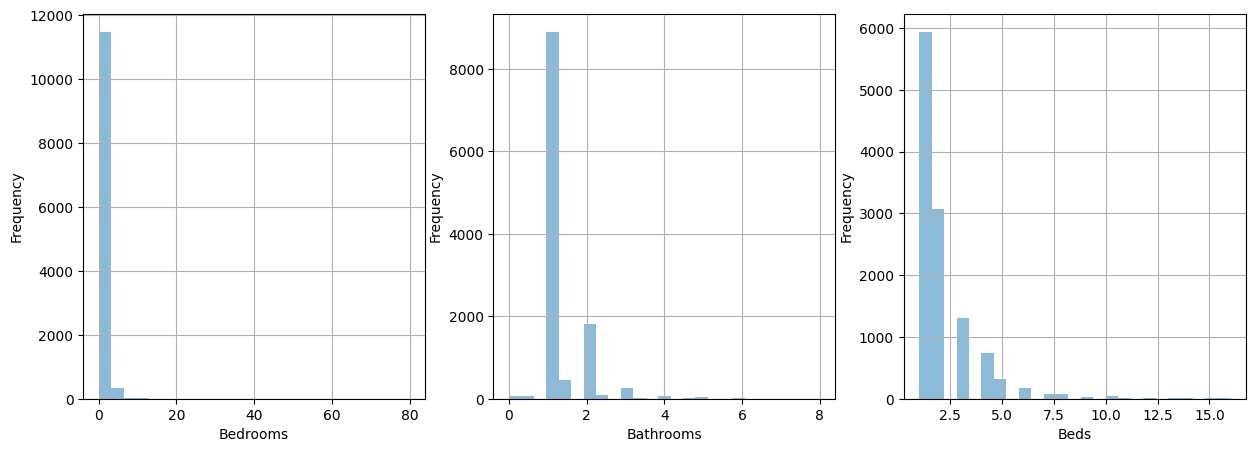

In [114]:
#Dibujamos las variables que a priero creemos que van a influir sobre el precio.
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
house_data['Bedrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Bedrooms')

plt.subplot(1,3,2)
house_data['Bathrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Bathrooms')

plt.subplot(1,3,3)
house_data['Beds'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Beds')

plt.show()

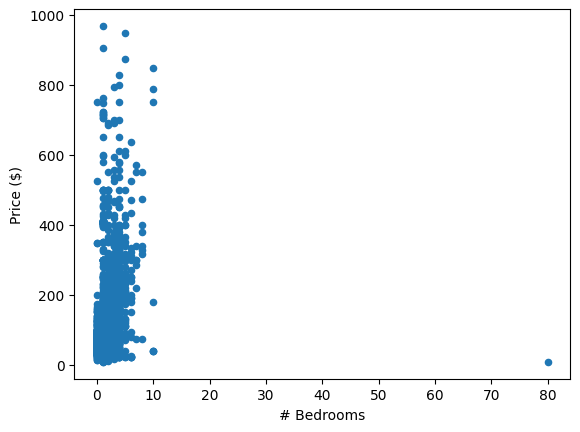

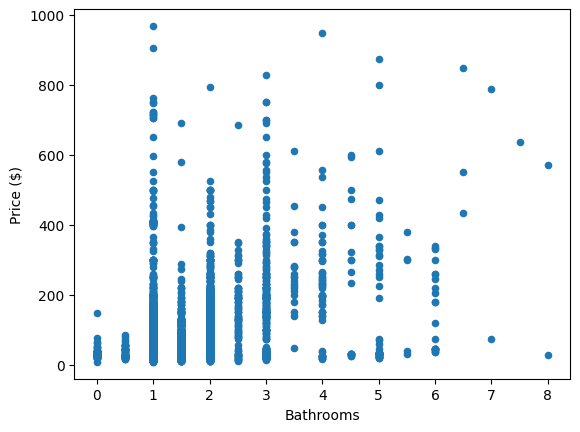

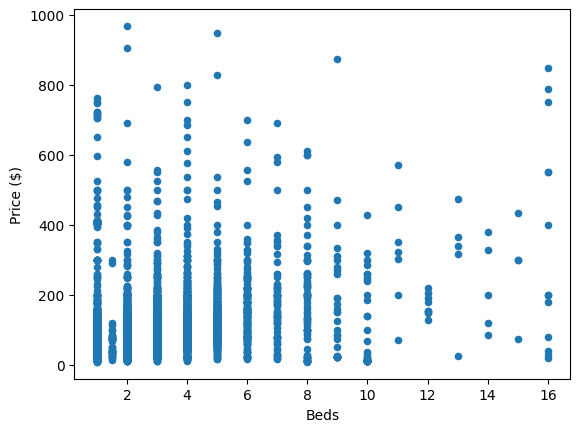

In [115]:
# La distribucion de las variasbles tiene sentido, la mayoria de las casas tienen entre 0 y 10 habitaciones y 1 o 2 baños
#Vamos a ver si hay datos anómalos:

house_data.plot(kind = 'scatter',x='Bedrooms',y = 'Price')
plt.xlabel('# Bedrooms')
plt.ylabel('Price ($)')
plt.show()

house_data.plot(kind = 'scatter',x='Bathrooms',y = 'Price')
plt.xlabel('Bathrooms')
plt.ylabel('Price ($)')
plt.show()
house_data.plot(kind = 'scatter',x='Beds',y = 'Price')
plt.xlabel('Beds')
plt.ylabel('Price ($)')
plt.show()

plt.show()

In [116]:
# Consideramos que la casa con 80 habitaciones no es razonable ni las que tienen mas de 6 baños.

In [117]:
# teniamos 11.825 filas, antes de quitar los valores anómalos y 2.957 de test

house_data = house_data.loc[house_data['Bedrooms'] < 80] # quitamos la casa de 80 habitaciones
house_data = house_data.loc[house_data['Bathrooms'] < 6] # quitamos la casa con más de 6 baños

test = test.loc[test['Bedrooms'] < 80] # quitamos la casa de 80 habitaciones
testtest = test.loc[test['Bathrooms'] < 6] # quitamos la casa con más de 6 baños


house_data.shape




(11793, 26)

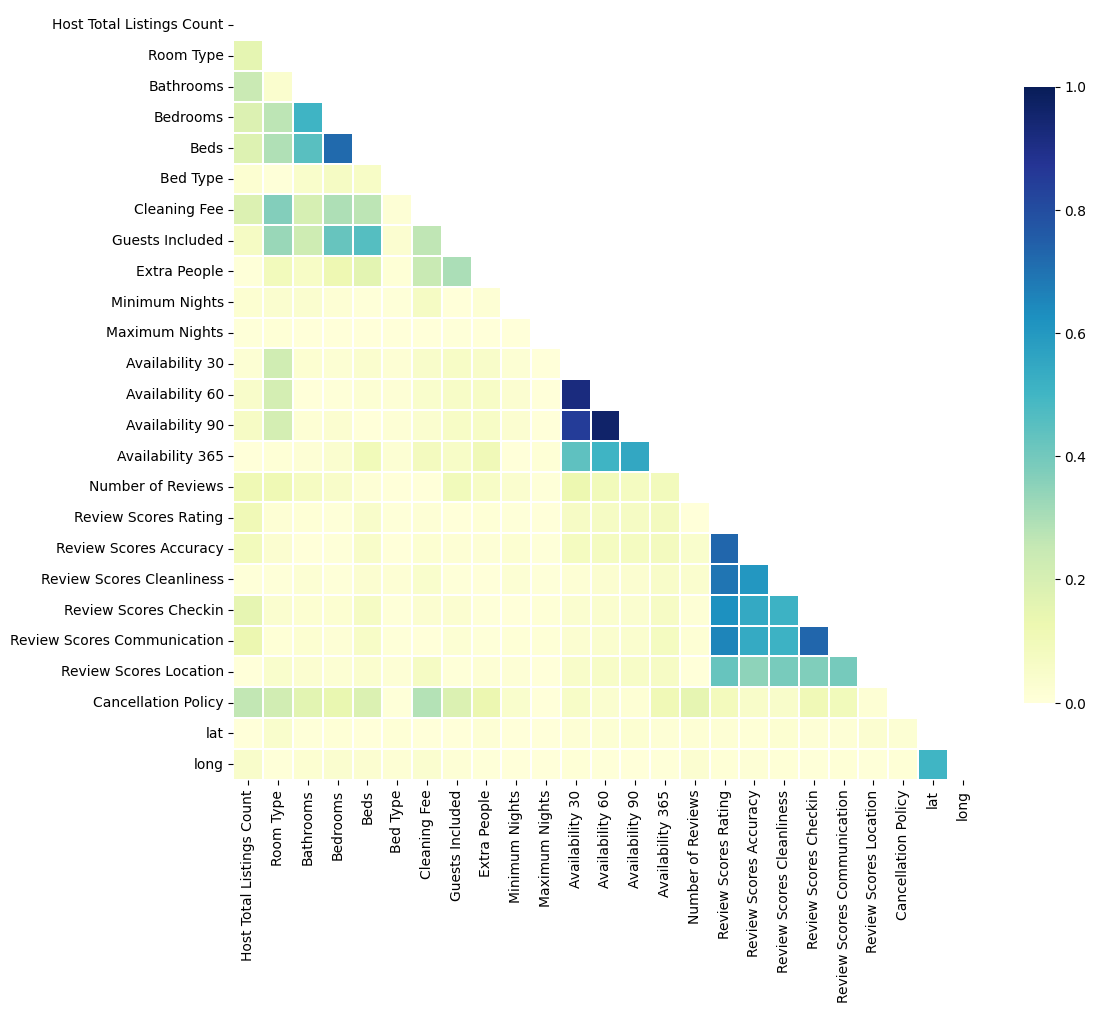

In [118]:
#Pintamos la matriz de correlacion
import seaborn as sns

corr = np.abs(house_data.drop(['Price'], axis=1).corr())

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True


f, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [119]:
#Mostramos las correlaciones más grandes, y vamos a quitar las que tienen coef. de correlacion mayor a 0.8
correlation_aa = corr.loc['Availability 60', 'Availability 30']
correlation_aa2 = corr.loc['Availability 90', 'Availability 30']
correlation_aa3 = corr.loc['Availability 90', 'Availability 60']


print(correlation_aa)
print(correlation_aa2)
print(correlation_aa3)


0.9210100031352321
0.8488198311205447
0.96271029237914


In [120]:

house_data=house_data.drop(columns=['Availability 60', 'Availability 90'])

test=test.drop(columns=['Availability 60', 'Availability 90'])



In [128]:
#Separamos las variables independientes en X y la variable dependiente en y.
X = house_data.drop(columns=['Price']) 
y = house_data['Price'] 

X_test = test.drop(columns=['Price']) 
y_test = test['Price'] 



In [122]:
#Quitamos si hay NaN 
X = X.dropna()
X_test = X_test.dropna()

y= y[X.index]  
y_test= y_test[X_test.index] 


In [123]:
import sklearn
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

best mean cross-validation score: 0.597
best parameters: {'max_depth': 17}


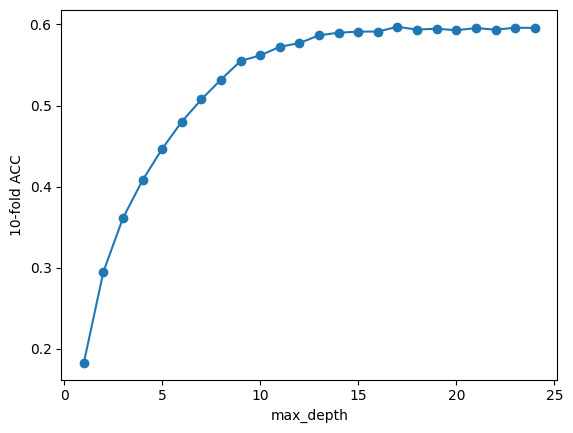

In [125]:
#Usamos Random Forest para nuestro analisis, no vamos a normalizar ya que el modelo funcion mejor sin normalizar.
#Vamos a usar crossvalidation y ajustamos los datos.

maxDepth = range(1,25)
tuned_parameters = {'max_depth': maxDepth}

# Hize el primer cálculo con  200 estimadores y me salia Train:  0.9107681775557985 y Test:  0.5091626118086483; 
# Para corregir el Overfitting bajamos estimadores a 100.

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=80, max_features='sqrt'), cv=10, param_grid=tuned_parameters)
grid.fit(X, y)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [126]:
#El mejor depth para nuestro arbol sale que es:17
maxDepthOptimo = grid.best_params_['max_depth']
randomForest = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(X,y)

print("Train: ",randomForest.score(X,y))
print("Test: ",randomForest.score(X_test,y_test))

Train:  0.8995783805769976
Test:  0.4970509115287758


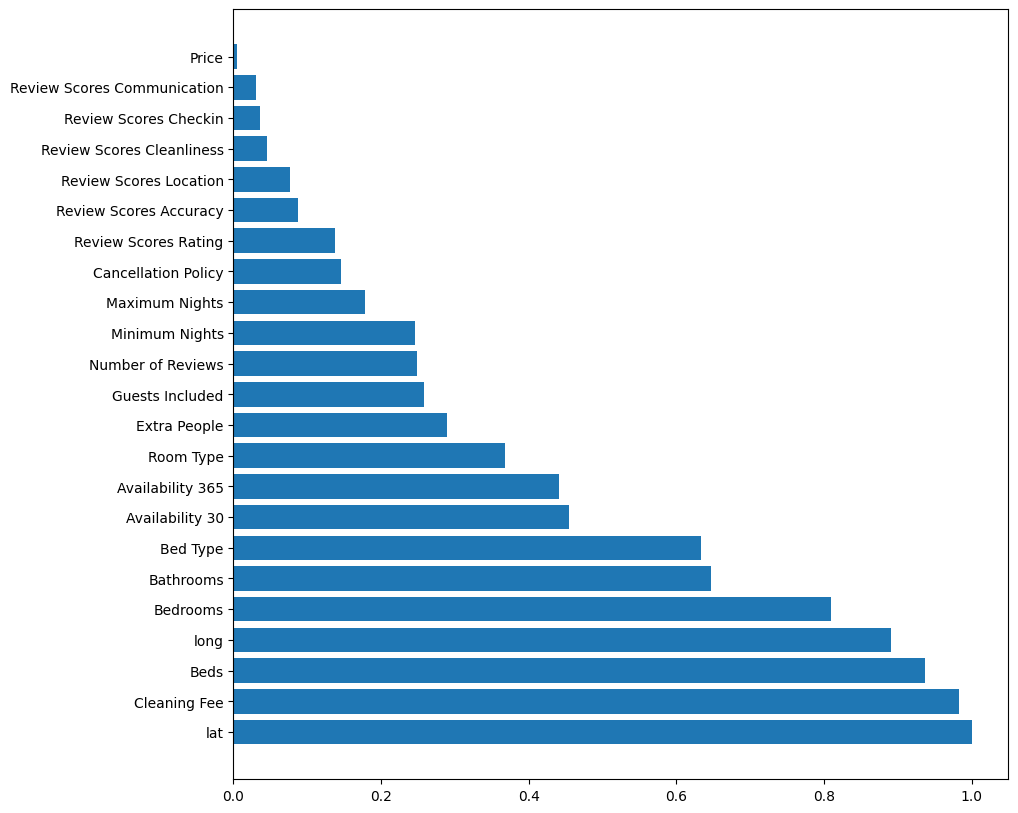

In [129]:
#Vemos las caracterisicas que mas influyen sobre el precio:
importances = randomForest.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X.shape[1]),importances[indices])
plt.yticks(range(X.shape[1]),feature_names[indices])
plt.show()

La conclusion que podemos sacar es que nuetro modelo esta sobreajustado, ya que se ajusta a los datos de entrenamiento pero a la hora de predecir nos da la pero prediccion posible.
Las variables que mejor predicen son la latitul, el numero de camas o el cleaning fee.
